# **Task-04**

#**Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.**

###Importing python packages

In [ ]:
#Data processing packages
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', 200)

#Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

#NLP packages
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

###Testing Sentiment Analysis (sample

In [ ]:
#Testing NLP - Sentiment Analysis using TextBlob
TextBlob("The movie is good").sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

#Importing YouTube comments data

In [ ]:
#Importing YouTube comments data
comm = pd.read_csv('UScomments.csv',encoding='utf8',error_bad_lines=False);#opening the file UScomments

Skipping line 41589: expected 4 fields, saw 11
Skipping line 51628: expected 4 fields, saw 7
Skipping line 114465: expected 4 fields, saw 5

Skipping line 142496: expected 4 fields, saw 8
Skipping line 189732: expected 4 fields, saw 6
Skipping line 245218: expected 4 fields, saw 7

Skipping line 388430: expected 4 fields, saw 5



#Displaying first 5 rows of data

In [ ]:
#Displaying the first 5 rows of the data
comm.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your vine channel and have seen all 365 vlogs,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [ ]:
#Finding the size of the data
comm.shape

(691400, 4)

###Extracting 1000 random samples from the data

In [ ]:
comm = comm.sample(2000)
comm.shape

(2000, 4)

###Calculating Sentiment polarity for each comment

In [ ]:
#Calculating the Sentiment Polarity
pol=[] # list which will contain the polarity of the comments
for i in comm.comment_text.values:
    try:
        analysis =TextBlob(i)
        pol.append(analysis.sentiment.polarity)

    except:
        pol.append(0)

#Adding the Sentiment Polarity column to the data

In [ ]:
#Adding the Sentiment Polarity column to the data
comm['pol']=pol

###Converting the polarity values from continuous to categorical

In [ ]:
#Converting the polarity values from continuous to categorical
comm['pol'][comm.pol==0]= 0
comm['pol'][comm.pol > 0]= 1
comm['pol'][comm.pol < 0]= -1

###Displaying Positive comments

In [ ]:
#Displaying the POSITIVE comments
df_positive = comm[comm.pol==1]
df_positive.head(10)

,video_id,comment_text,likes,replies,pol
121322,WYYvHb03Eog,You guys will never give an honest review on the iPhone x so not to lose your early access of Apple devices.,0,0,1.0
206747,RIGgn1s3AvI,"I love you ❤️, never stop",0,0,1.0
164611,lokFoo_QD8c,She's gorgeous !,0,0,1.0
460797,ypXwioZXUrE,*Is life repetitive?*\n\n\nIs life a pattern?\n\nPattern of lies no matter how you try to prove it’s not..?\n\nPatterns of *”types”* of people? Feelings? Thoughts? Expressions?\n\n\nAlways expecte...,0,0,1.0
133547,GyxgtAwn34A,Lele you are idol beautiful 💋👩🏼,0,0,1.0
644241,ZWTlL_w8cRA,you are amazing! i love you!!! 😍😍😍😘,0,0,1.0
530126,-UAdFerZMWc,How many hours,0,0,1.0
230176,nW-aml4r7Gc,Flames!!!! Beautiful vocals,0,0,1.0
307892,xQ4oE_tL7IA,I freaking love the parts she aggressively goes RAH!,4,0,1.0
418590,IQisUbBljW0,I think it's a prerequisite for every talk show how to be a complete wuss around animals. I'd rather see them really enjoy the experience than be afraid. Fassbender was great with all of them.,0,0,1.0


###Displaying Negative comments

In [ ]:
#Displaying the NEGATIVE comments
df_positive = comm[comm.pol==-1]
df_positive.head(10)

,video_id,comment_text,likes,replies,pol
109864,2m65xSqUWaI,White men having these blankets saying it was passed down in their family. It was probably taken from a native american corpse their ancestor's murdered at cold blood.,1,0,-1.0
582293,_F-vmhCq6uw,Uhh... Common sense on fox... This is a helluva dream,0,0,-1.0
574265,DUMEmGUc7yc,"My brother's old house had tons of little random doors around the house to hide electrical boxes and little things like that. I miss that house. I felt so much old fashioned nostalgia in there, de...",0,0,-1.0
246133,MFoODeZfSD0,"Can a laser cock potato cook? I'm dyslexic, bear with me please. This is everyday life for me.",1,0,-1.0
80163,9lzPw4EOqto,Is it weird I felt my mouth starting to water?,0,0,-1.0
379334,APHgDFRpCi0,worst fucking collab ever. bitch cant sing spanish i can hear the auto tune,1,1,-1.0
277911,ICqTZeiimpk,"They're poor oppressed millionaires what a joke! The FBI statistics came out, and everything they were claiming is false. The police kill more whites than blacks every year. Yet we're supposed to ...",1,1,-1.0
470225,vrcG-SckgJk,You this read wrong\n\n\nYou read that wrong,1,0,-1.0
608211,iKYQN5xMRQg,People pay money to watch this crap? The fight was the only entertainment till the rent a cop spoilt the fun.,0,1,-1.0
281807,mkrTKyhONJ4,God I miss Jon Stewart...at least he was funny.,0,0,-1.0


###Displaying Neutral comments

In [ ]:
#Displaying the NEUTRAL comments
df_positive = comm[comm.pol==0]
df_positive.head(10)

,video_id,comment_text,likes,replies,pol
425746,efD3nmwF-IM,"Хоть кто-нибудь из творческой братии взялся бы за экранизацию событий войны Танца драконов, или Восстания Блекфаера",0,0,0.0
669989,XPqko6Q0lpE,♥♥♥♥ ♥♥♥♥♥ ♥♥♥♥ ♥♥♥♥ ♥♥♥♥\n*Jesus Christ is the Son of God & promises you eternal life if you simply believe Him.*\n*He promised to also heal your body. (Just ask Him)*,0,0,0.0
97594,Auu9Sxxt5is,OR THIS O NE?\n``````¶0````1¶1_```````````````````````````````````````\n```````¶¶¶0_`_¶¶¶0011100¶¶¶¶¶¶¶001_````````````````````\n````````¶¶¶¶¶00¶¶¶¶¶¶¶¶¶¶¶¶¶¶¶¶¶¶¶¶¶¶0_````````````````\n`````1_``¶...,0,0,0.0
570179,hkA2a4_tNOs,Why I like trains by TomSka in this shitty movie?,0,0,0.0
647875,Lf50KrdASTI,Ttttttttttttttffffccccr,0,0,0.0
211429,HkoGtBEA1co,Definitely wearing look #4 for my baby shower 😍,0,0,0.0
78524,TngCi2s5rmk,just alittle weed u can do it too,0,0,0.0
452320,PpGyVCu2n9g,People of poop color,0,0,0.0
334678,APHgDFRpCi0,Here for Anitta,0,1,0.0
102028,ZtXkNMbjOEE,Hi,0,0,0.0


###Calculating the count of Positive, Negative & Neutral comments

 1.0    871
 0.0    821
-1.0    308
Name: pol, dtype: int64

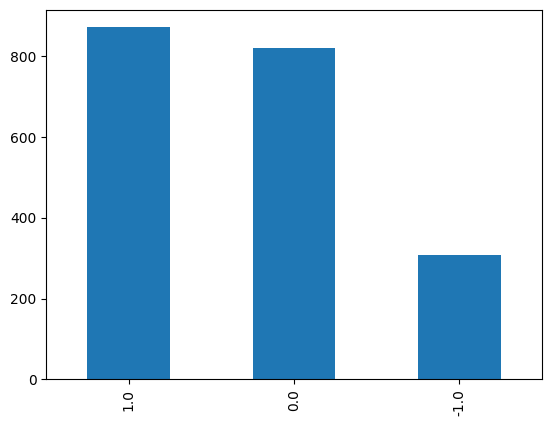

In [ ]:
comm.pol.value_counts().plot.bar()
comm.pol.value_counts()